In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numdifftools as nd

sns.set_style("darkgrid")
sns.set_context("talk")

random_seed = 164
np.random.seed(random_seed)

# Binary Classification

## Dataset (Dataset IV)

In [2]:
n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
x = np.concatenate([x, np.ones([n, 1])], axis=1)
y = (2*x[:, 0] - x[:, 1] + 0.5 + 0.5*np.random.randn(n)) > 0
y = 2*y - 1
y = y.reshape(-1, 1)

n_classes = x.shape[1]

print("X shape: ", x.shape)
print("y shape: ", y.shape)

print("x sample:")
print(x[:5])
print("y sample:")
print(y[:5])

X shape:  (200, 5)
y shape:  (200, 1)
x sample:
[[-0.4290518  -0.57989301 -0.66524249  0.97602047  1.        ]
 [-0.04180575  0.63533931 -1.2630474   0.84111015  1.        ]
 [ 0.14561245 -1.03151756  0.31741401 -0.57527893  1.        ]
 [-1.08384405 -1.38029416  1.35167584 -0.21032079  1.        ]
 [ 1.17400788  0.59287948 -0.63284134  0.36078276  1.        ]]
y sample:
[[1]
 [1]
 [1]
 [1]
 [1]]


(200, 2)


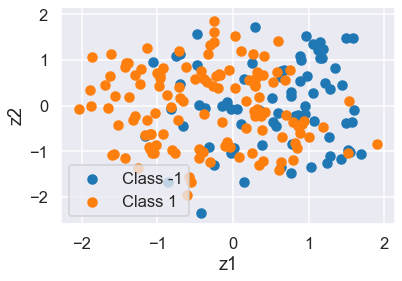

In [3]:
from sklearn.decomposition import IncrementalPCA
def pca(X):
    ipca = IncrementalPCA(n_components=2, batch_size=3)
    return ipca.fit_transform(X)

def pca_and_plot(x, y):
    classes = np.unique(y) 
    x_pca = pca(x)
    print(x_pca.shape)
    y_plot = y.ravel()
    
    for i in classes:
        plt.scatter(x_pca[y_plot == i, 0], x_pca[y_plot == i, 1], label="Class " + str(i))
    plt.xlabel("z1")
    plt.ylabel("z2")
    plt.legend()
    plt.show()
    
pca_and_plot(x, y)

# Batch steepest descent method

Accuracy: 0.92
Weights:  [[ 7.40851414]
 [-3.75714194]
 [-0.56681358]
 [ 0.47285327]
 [ 2.00396159]]


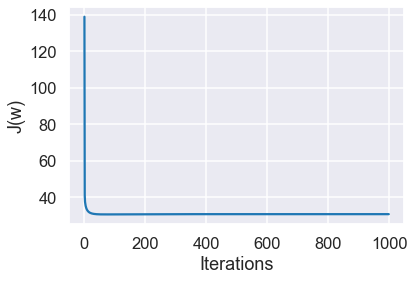

In [4]:
n_iter = 1000
eta = 0.05
lamda = 0.0001

from models import LRGD

clf_gd = LRGD(n_iter=n_iter, eta=eta, lamda=lamda, random_state=random_seed)
clf_gd.fit(x, y)
y_pred = clf_gd.predict(x)
print("Accuracy:", clf_gd.score(x, y))
print("Weights: ", clf_gd.w_)
plt.plot(range(n_iter), clf_gd.cost_)
plt.xlabel("Iterations")
plt.ylabel("J(w)")
plt.show()

# Newton Method

Accuracy: 0.925
Weights:  [[ 4.20764256]
 [-1.93541722]
 [-0.36235432]
 [ 0.35361128]
 [ 1.10715644]]


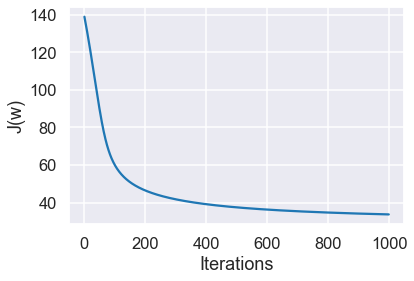

In [5]:
from models import LRNewton

clf_newton = LRNewton(eta=0.1, n_iter=n_iter, lamda=0, random_state=random_seed)
clf_newton.fit(x, y)
y_pred = clf_newton.predict(x)
print("Accuracy:", clf_newton.score(x, y))
print("Weights: ", clf_newton.w_)
plt.plot(range(n_iter), clf_newton.cost_)
plt.xlabel("Iterations")
plt.ylabel("J(w)")
plt.show()

# Error comparison

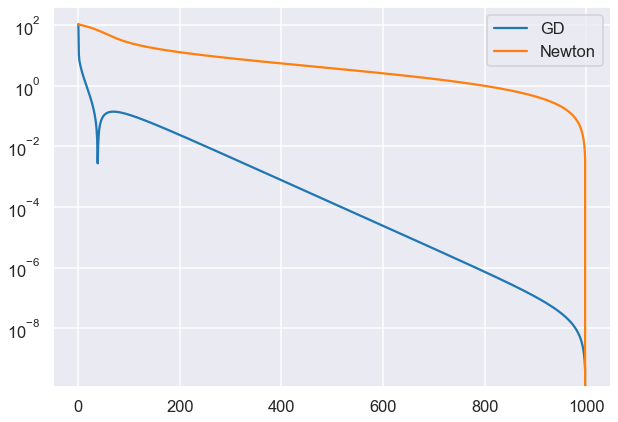

In [6]:
plt.figure(figsize=(10, 7))
plt.semilogy(range(n_iter), np.abs(clf_gd.cost_ - clf_gd.cost_[-1]), label="GD")
plt.semilogy(range(n_iter), np.abs(clf_newton.cost_ - clf_newton.cost_[-1]), label="Newton")
plt.legend()
plt.ylim()
plt.show()

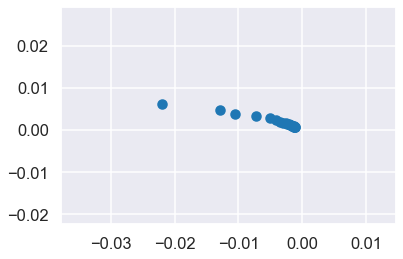

In [7]:
w_hist = np.array(clf_newton.w_hist_)

j = [i for i in range(0, n_iter, 50)]
j.append(n_iter - 1)

plt.scatter(w_hist[j, 0], w_hist[j, 1])
plt.show()

# Multiclass Classication

## Dataset V

In [8]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
x_d5 = np.hstack([x_d5, np.ones((n, 1))])
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)
y_d5 = y_d5.reshape(-1, 1)
n_classes = x_d5.shape[1]

print("X shape: ", x_d5.shape)
print("y shape: ", y_d5.shape)

print("x sample:")
print(x_d5[:5])
print("y sample:")
print(y_d5[:5])

X shape:  (200, 5)
y shape:  (200, 1)
x sample:
[[ 0.14644051  0.6455681   0.30829013  0.13464955  1.        ]
 [-0.2290356   0.43768234 -0.18723837  1.175319    1.        ]
 [ 1.39098828 -0.34967544  0.87517511  0.08668476  1.        ]
 [ 0.20413368  1.27678991 -1.28689183 -1.2386121   1.        ]
 [-1.43934481  0.99785954  0.83447025  1.11003644  1.        ]]
y sample:
[[2]
 [2]
 [2]
 [2]
 [1]]


(200, 2)


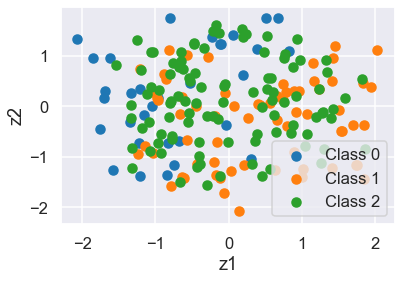

In [9]:
from sklearn.decomposition import IncrementalPCA
def pca(X):
    ipca = IncrementalPCA(n_components=2, batch_size=3)
    return ipca.fit_transform(X)

def pca_and_plot(x, y):
    classes = np.unique(y) 
    x_pca = pca(x)
    print(x_pca.shape)
    y_plot = y.ravel()
    
    for i in classes:
        plt.scatter(x_pca[y_plot == i, 0], x_pca[y_plot == i, 1], label="Class " + str(i))
    plt.xlabel("z1")
    plt.ylabel("z2")
    plt.legend()
    plt.show()
    
pca_and_plot(x_d5, y_d5)

# Batch steepest descent method

Accuracy: 0.39285
Weights:  [[ 5.83592597 -9.11915203  3.26744928]
 [-6.54947535  2.92965997  3.63150872]
 [-0.06434624 -0.36781297  0.40611031]
 [-0.4743467   0.27529051  0.21283146]
 [-3.71373055 -1.24345168  4.97525183]]


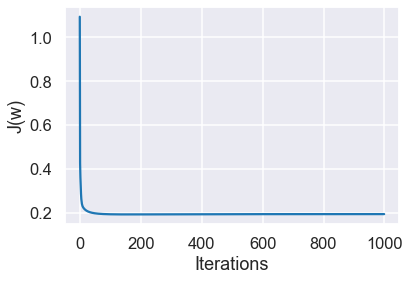

In [10]:
from models import MultiClassLRGD

n_iter = 1000
eta = 0.05
lamda = 0.0001

clf_gd = MultiClassLRGD(n_iter=n_iter, eta=eta, lamda=lamda, random_state=random_seed)
clf_gd.fit(x_d5, y_d5)
y_pred = clf_gd.predict(x_d5)
print("Accuracy:", clf_gd.score(x_d5, y_d5))
print("Weights: ", clf_gd.w_)
plt.plot(range(n_iter), clf_gd.cost_)
plt.xlabel("Iterations")
plt.ylabel("J(w)")
plt.show()

Accuracy: 0.39285
Weights:  [[ 5.84754176 -9.13076707  3.26736945]
 [-6.56959692  2.9398307   3.64151817]
 [-0.06503918 -0.36798468  0.40684438]
 [-0.47600802  0.27607687  0.21377547]
 [-3.72965314 -1.23837234  4.98618565]]


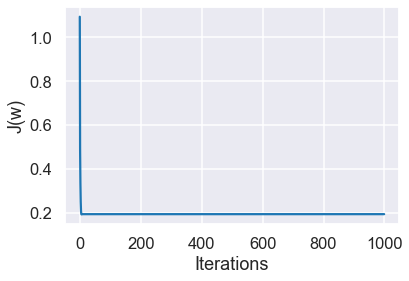

In [11]:
from models import MultiClassNewtonGD

n_iter = 1000
eta = 0.05
lamda = 0.0001

clf_newton = MultiClassNewtonGD(n_iter=n_iter, eta=eta, lamda=lamda, random_state=random_seed)
clf_newton.fit(x_d5, y_d5)
y_pred = clf_newton.predict(x_d5)
print("Accuracy:", clf_newton.score(x_d5, y_d5))
print("Weights: ", clf_newton.w_)
plt.plot(range(n_iter), clf_newton.cost_)
plt.xlabel("Iterations")
plt.ylabel("J(w)")
plt.show()

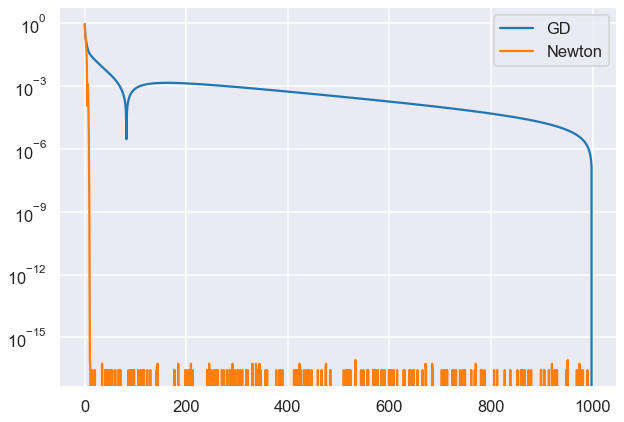

In [12]:
plt.figure(figsize=(10, 7))
plt.semilogy(range(n_iter), np.abs(clf_gd.cost_ - clf_gd.cost_[-1]), label="GD")
plt.semilogy(range(n_iter), np.abs(clf_newton.cost_ - clf_newton.cost_[-1]), label="Newton")
plt.legend()
plt.ylim()
plt.show()